In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
%matplotlib inline

2023-01-16 04:36:56.858258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 04:36:57.189565: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 04:36:57.189602: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-16 04:36:58.759523: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
train = pd.read_csv('data/train.csv')

In [70]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
train_array = train.values

In [72]:
train_array.shape

(42000, 785)

In [73]:
x, y = train_array[:, 1:], train_array[:, 0]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

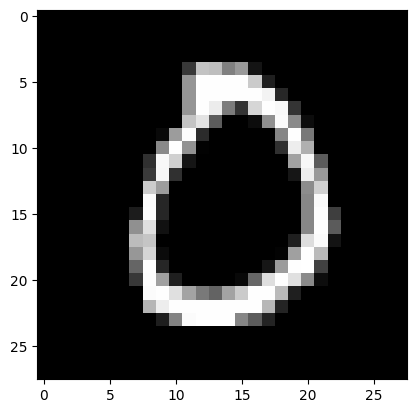

In [7]:
img = X_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

In [71]:
X_train.shape

(33600, 784)

In [72]:
X_test.shape

(8400, 784)

In [76]:
X_train = X_train.reshape(X_train.shape[0], 1, 28*28)
X_train = X_train.astype('float32')

X_test = X_test.reshape(X_test.shape[0], 1, 28*28)
X_test = X_test.astype('float32')

#normalization
X_train /= 255
X_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [63]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

   
    def forward_propagation(self, input):
        pass

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        pass

In [62]:
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error #dE/dX

In [58]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):
        self.layers.append(layer)

    
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime


    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

    
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

 
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

              
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))


In [64]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [65]:
# activation functions and its derivatives
def tanh(x):
    return np.tanh(x)

def tanh_der(x):
    return 1-np.tanh(x)**2

def sigmoid(x):
    return 1/(1+np.exp(-x))
    

# def sigmoid_der(x):    
#     Z = cache
#     s = 1/(1+np.exp(-Z))
#     dZ = dA * s * (1-s)
#     assert (dZ.shape == Z.shape)
#     return dZ


In [66]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_der(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [129]:
net = Network()
net.add(FCLayer(28*28, 128))             
net.add(ActivationLayer(tanh, tanh_der))
net.add(FCLayer(128, 64))                
net.add(ActivationLayer(tanh, tanh_der))
net.add(FCLayer(64, 10))                    
net.add(ActivationLayer(tanh, tanh_der))


net.use(mse, mse_der)
net.fit(X_train, y_train, epochs=5, learning_rate=0.1)

# test on 3 samples
y_pred = net.predict(X_test)
print("\n")
print("predicted values : ")
print(y_pred[0:3], end="\n")
print("true values : ")
print(y_test[0:3])

epoch 1/5   error=0.064058
epoch 2/5   error=0.030534
epoch 3/5   error=0.023974
epoch 4/5   error=0.020478
epoch 5/5   error=0.018060


predicted values : 
[array([[ 0.02482789,  0.0371646 , -0.05451538,  0.60664228, -0.09960291,
        -0.03323428, -0.00287257,  0.00880166,  0.8839072 , -0.08743552]]), array([[-0.03050972,  0.0190834 , -0.07940998,  0.99395741, -0.10638108,
         0.02165033, -0.00388275,  0.01623156,  0.10018222,  0.05792011]]), array([[-0.00840325,  0.01022186, -0.02599618,  0.55795329,  0.0143014 ,
        -0.00184051, -0.00943979,  0.01826934,  0.08200943,  0.81029151]])]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [192]:
def get_digit(arr):
    for i, x  in enumerate(arr):
        predicted = np.argmax(arr[i],1)
        true = np.argmax(y_test[i], 0)
        print(predicted, true)

In [193]:
get_digit(y_pred[0:20:1])

[8] 8
[3] 3
[9] 9
[5] 5
[4] 4
[3] 3
[5] 5
[4] 4
[4] 4
[5] 5
[5] 5
[4] 4
[7] 7
[0] 0
[4] 4
[4] 4
[0] 2
[3] 3
[8] 8
[7] 7


In [165]:
test = pd.read_csv('data/test.csv')

In [166]:
test = test.values

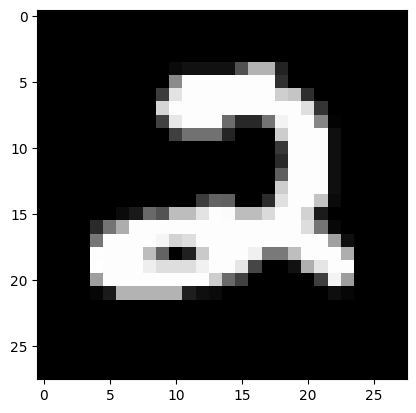

In [167]:
img = test[0].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

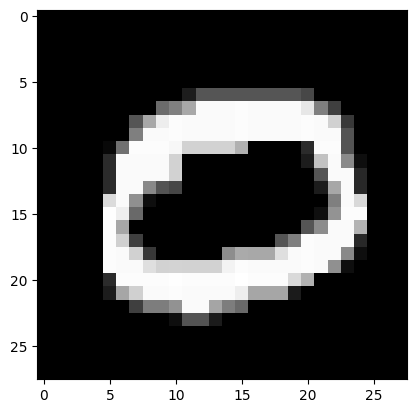

In [179]:
img = test[1].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

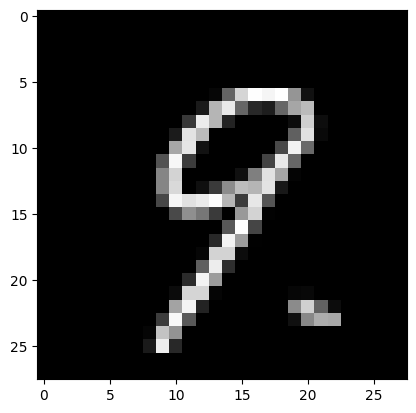

In [180]:
img = test[2].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

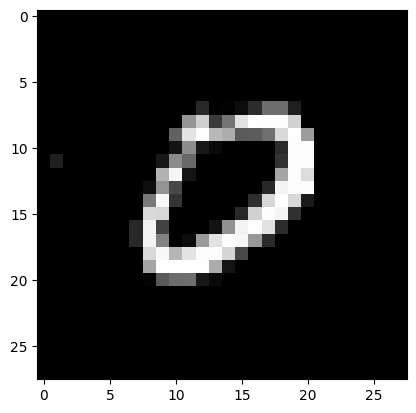

In [181]:
img = test[3].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

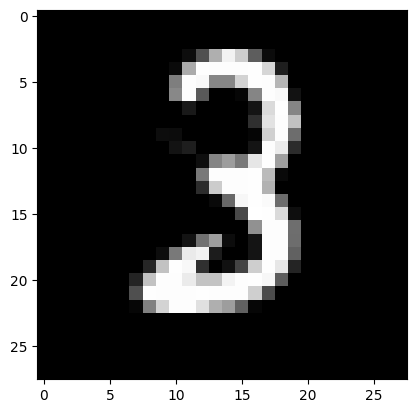

In [195]:
img = test[4].reshape(28,28)
plt.imshow(img, cmap='gray')
plt.show()

In [168]:
y_pred_test = net.predict(test)

In [194]:
# look only at first column
get_digit(y_pred_test[0:5:1])

[2] 8
[0] 3
[9] 9
[9] 5
[3] 4
